In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/train_titanic.csv'

In [3]:
titanic_data_set=pd.read_csv(url,error_bad_lines=False)

c:\Users\zzz\Documents\CURSOS\EDA\venv\lib\site-packages\IPython\core\interactiveshell.py:3437: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
titanic_data_set.shape

(891, 12)

In [5]:
titanic_data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Sacando el totl de los datos nulos por columna
titanic_data_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Haciendo nuestra primera hipotesis
# Afectará el sexo para la supervivencia?

# Tenemos que obtener la tasa de supervivencia por sexo

In [11]:
mujeres =titanic_data_set.loc[titanic_data_set.Sex == 'female']['Survived']

# Suma de mujeres que sobrevivieron / cantidad total de mujeres
tasa_mujeres = sum(mujeres)/len(mujeres)
tasa_mujeres

0.7420382165605095

In [12]:
hombres =titanic_data_set.loc[titanic_data_set.Sex == 'male']['Survived']

# Suma de mujeres que sobrevivieron / cantidad total de mujeres
tasa_hombres = sum(hombres)/len(hombres)
tasa_hombres

0.18890814558058924

In [14]:
# Agrupando y asignando nombres
titanic_data_set['name_survived'] = titanic_data_set['Survived'].map({0: 'Dead', 1: 'Alive'})

c:\Users\zzz\Documents\CURSOS\EDA\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

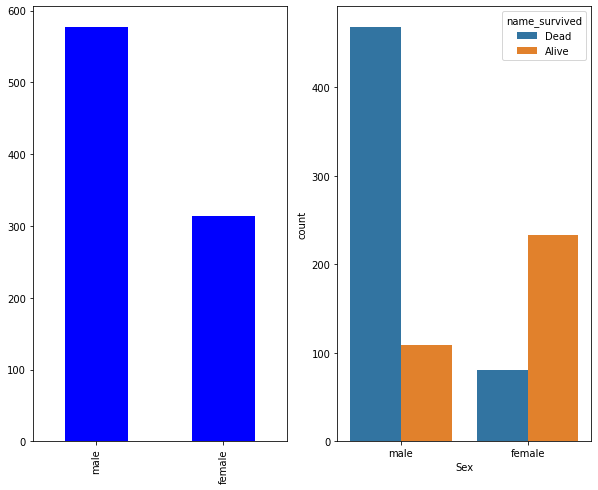

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10,8))
titanic_data_set['Sex'].value_counts().plot.bar(color='blue',ax=ax[0])


sns.countplot('Sex', hue='name_survived', data=titanic_data_set, ax=ax[1])

AttributeError: 'FacetGrid' object has no attribute 'dropna'

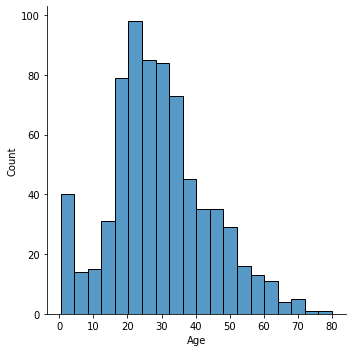

In [24]:
# Otra teoria: La edad está afectando en la supervivencia

sns.displot(titanic_data_set['Age']).dropna()

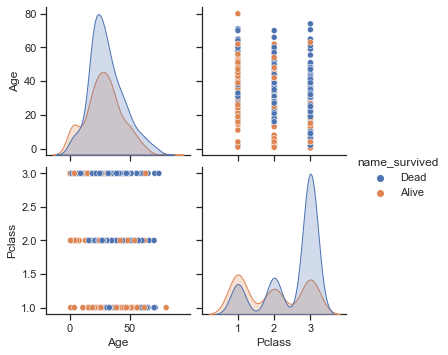

In [25]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(titanic_data_set, vars=['Age', 'Pclass'], hue='name_survived')

In [27]:
corr_titanic = titanic_data_set.corr(method='pearson')

<AxesSubplot:>

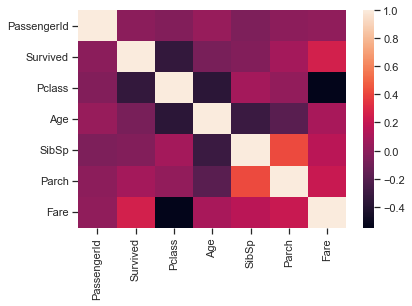

In [28]:
sns.heatmap(corr_titanic)

# Recordatorio

## Correlación no implica causalidad

La evidencia causal no fue facilitada por la prueba de correlación en sí, la cual simplemente estudia la relación entre datos observacionales.

Entender la causalidad es un tema complicado. En el mundo real, nunca podemos acceder a todos los datos que necesitaríamos para establecer todas las relaciones posibles entre variables. Pero hay algunas estrategias clave para ayudarnos a aislar y explorar los mecanismos entre diferentes variables. Por ejemplo, en un experimento controlado, podemos intentar crear dos grupos muy similares y aplicar al azar un tratamiento o intervención a uno solo de ellos.

El principio de la aleatorización es fundamental en el diseño experimental y entender este contexto puede cambiar lo que somos capaces de inferir de las pruebas estadísticas.


